# Bank Stock Price Project 

This project will focus on exploratory data analysis of stock prices using pandas, Seaborn and Plotly.
Specifically on bank stocks and how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Setup and data loading

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
bank_stocks = pd.read_pickle('bank_stocks') 
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

** List of the ticker symbols (as strings) in alphabetical order.**

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

## Exploratory Data Analysis

** Let's star by checking the maximum Close price for each bank's stock throughout the time period:**

In [4]:
bank_stocks.xs("Close",axis=1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Now let's create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [5]:
#bank_stocks.xs("Close", axis=1, level=1).head()
returns = pd.DataFrame()

In [6]:
for tick in tickers:
    returns [tick + " return"] = bank_stocks[tick]["Close"].pct_change()
   
returns.tail()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235
2015-12-31,-0.012903,-0.010516,-0.009780,-0.008410,-0.013031,-0.009656


** The following code creates a pairplot using seaborn of the returns dataframe. **

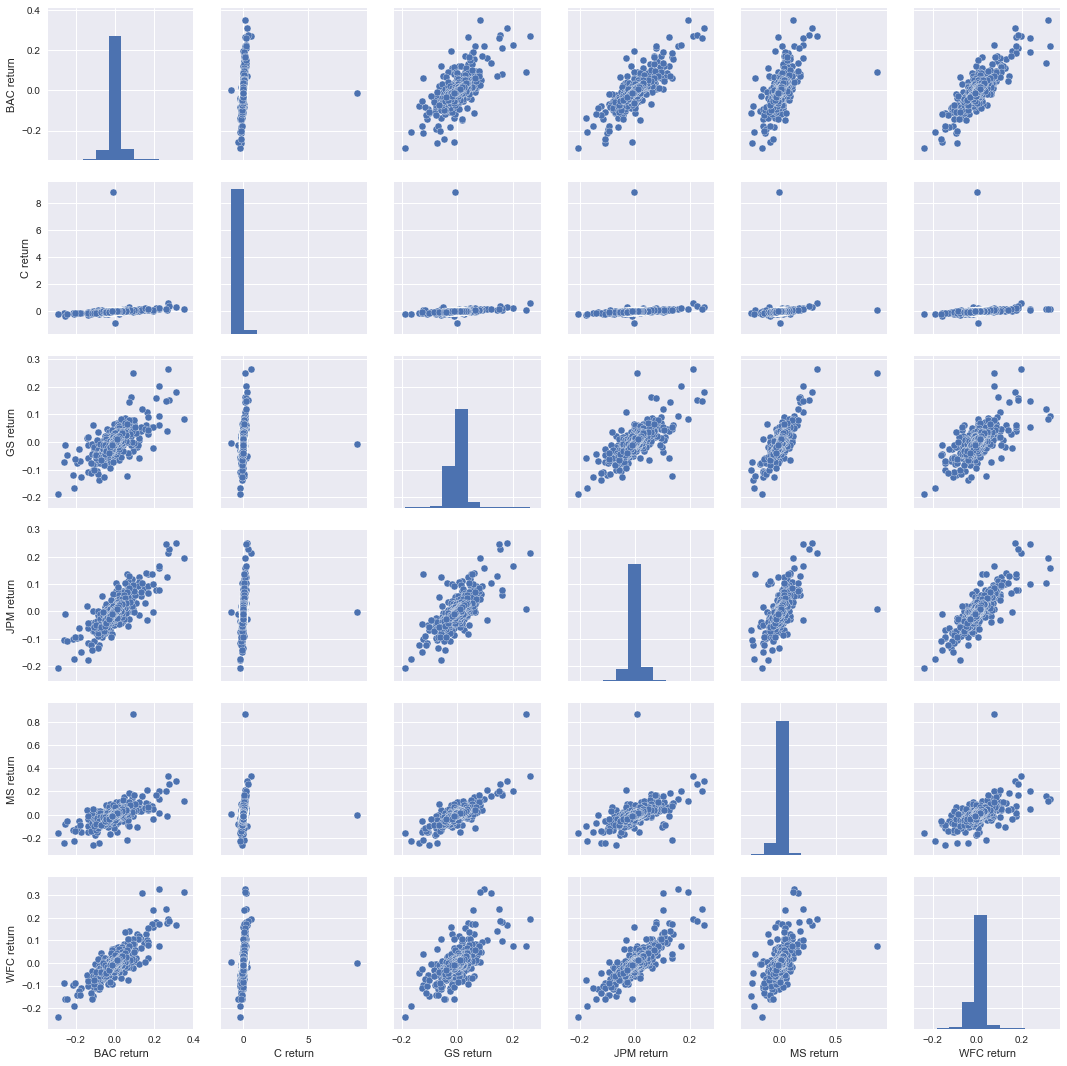

In [7]:
import seaborn as sns
sns.pairplot(returns[1:])

There is a unusual behavior in the case of Citigroup. The rest of scatter plots look relatively normal.

** Using this returns DataFrame, let’s figure out on what dates each bank stock had the best and worst single day returns. **

In [8]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [9]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

Four of the banks share the same day for the worst drop, that day Barack Obama inaugurated as the 44th President of the United States of America.

Citigroup's largest drop and biggest gain were very close to one another, in that time frame Citigroup had a reverse stock split.

** Now let’s take a look at the standard deviation of the returns, as a way to determine which stock is the riskiest over the entire time period, and which is the riskiest for the year 2015**

In [10]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

Citigroup's the riskiests over the entire time period

In [11]:
returns.loc['2015-01-01':].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

In 2015 all Banks have a similar risk profile, with Morgan Stanley and Bank of America having the highest risk, and Wells Fargo the lowest risk.

** Using seaborn, let’s create a distplot of the 2015 returns for Morgan Stanley **

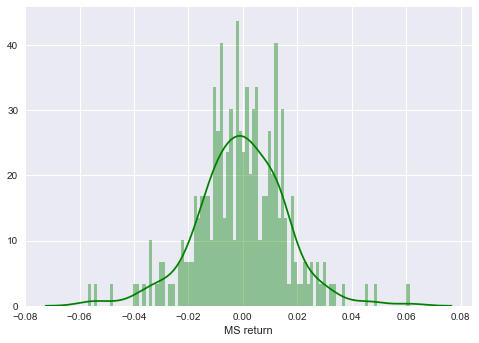

In [12]:
sns.distplot(returns.loc['2015-01-01':]["MS return"], color = "green", bins = 100)

** Distplot using seaborn of the 2008 returns for CitiGroup **

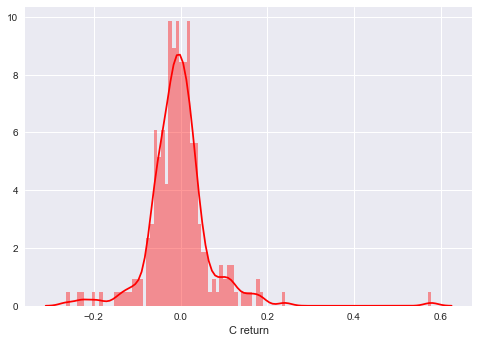

In [13]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']["C return"], color = "red", bins = 100)

If we compare both plots, we see that 2008 was a very volatile year for Citigroup, its returns had ten times the standard deviation of Morgan Stanley’s in 2015.

____
## More Visualization

Let’s continue our analysis using more advanced visualizations with seaborn, matplotlib, plotly and cufflinks, and also pandas built-in data visualization.

### Imports

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** First let's create a line plot showing Close price for each bank for the entire index of time. **

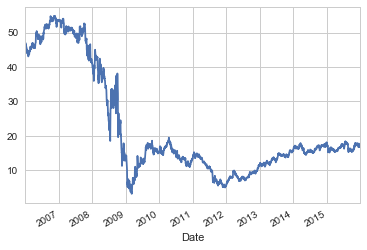

In [15]:
# Only BAC
bank_stocks.xs("Close", axis=1, level=1)["BAC"].plot()

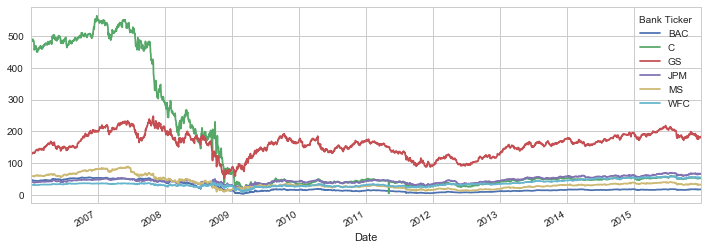

In [16]:
# All banks
bank_stocks.xs("Close", axis=1, level=1).plot(figsize=(12,4))

Here we can clearly see Citigroup’s crash after 2007. We can also see that Goldman Sachs dips and then bounces back in the 2008-2009 period.

In [17]:
# Using plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(xTitle = "Year", yTitle="Stock price (USD)")

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

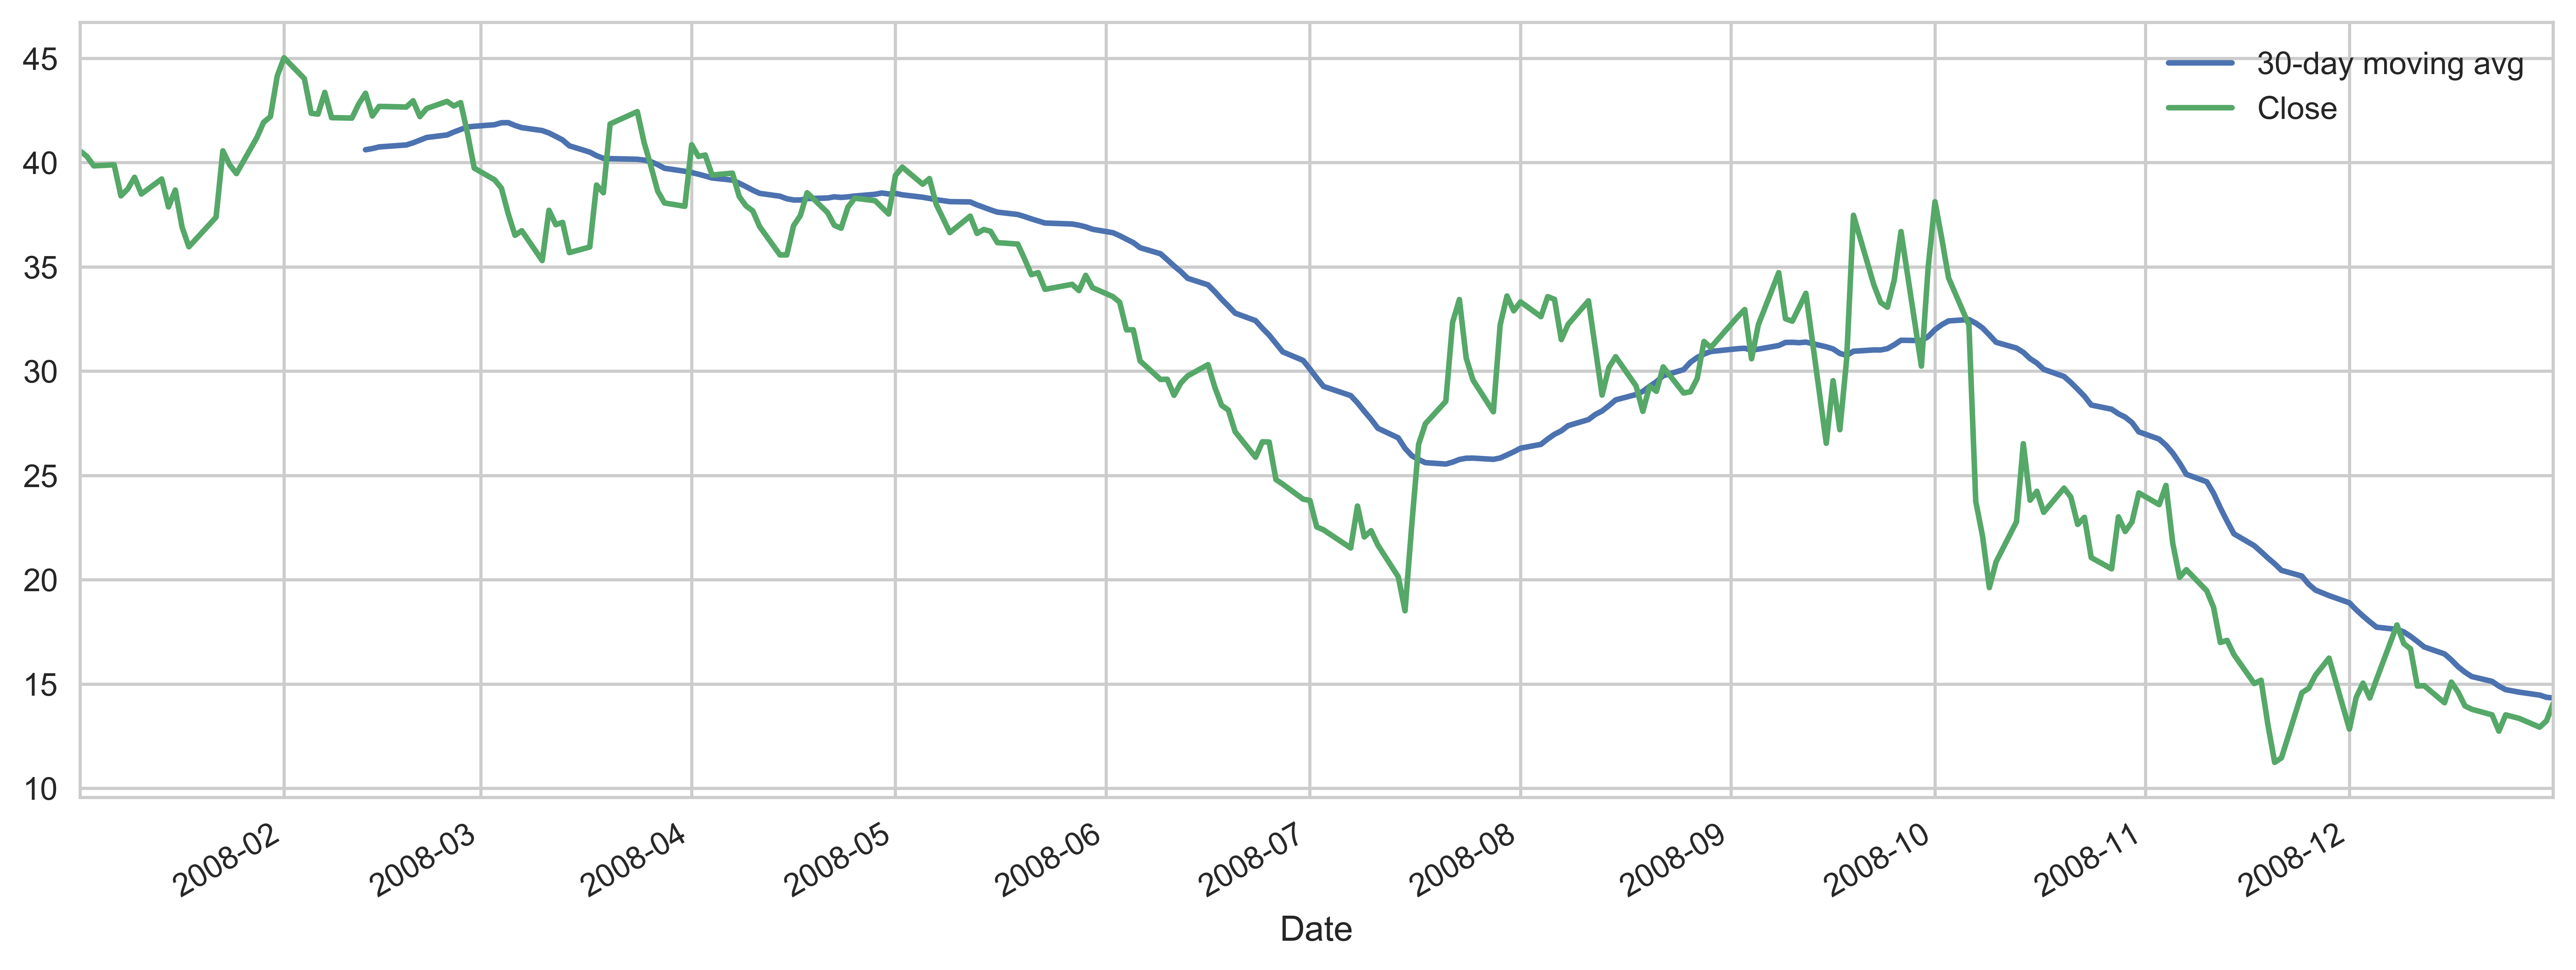

In [18]:
plt.figure(dpi=600)
bank_stocks.loc["2008-01-01":"2008-12-31"]["BAC"]["Close"].rolling(window=30).mean().plot(label="30-day moving avg")
bank_stocks.loc["2008-01-01":"2008-12-31"]["BAC"]["Close"].plot(figsize=(14,5))
plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

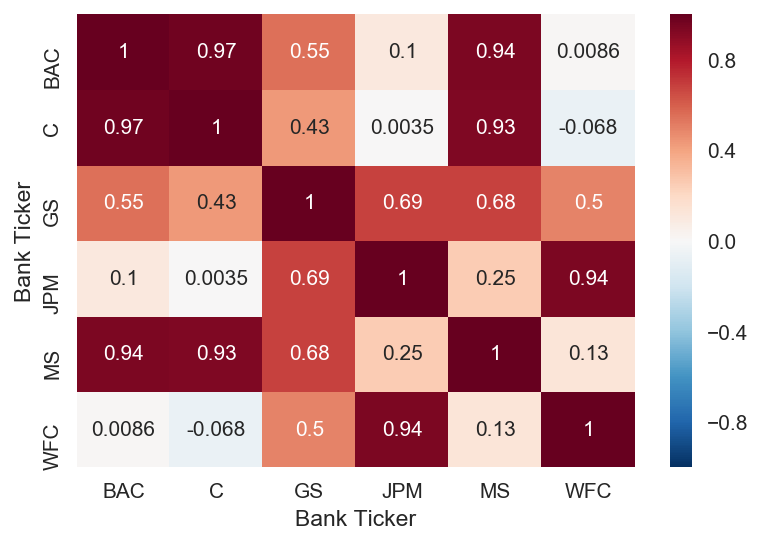

In [19]:
plt.figure(dpi=150)
sns.heatmap(bank_stocks.xs("Close", axis=1, level=1).corr(), annot=True)

** Seaborn's clustermap to cluster the correlations together:**

/Users/Juan/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



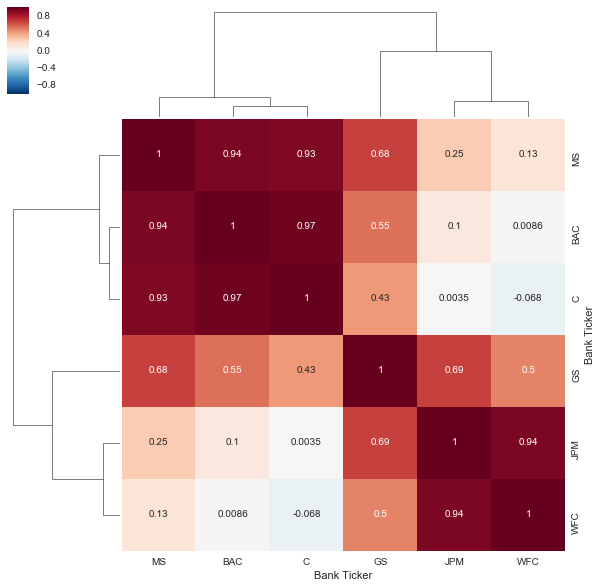

In [20]:
sns.clustermap(bank_stocks.xs("Close", axis=1, level=1).corr(), annot=True)

## Technical Analysis plots

In this final part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [21]:
bank_stocks.loc["2015-01-01":"2015-12-31"]["BAC"].iplot(kind="candle", title="Bank of America candlestick")

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [22]:
bank_stocks.loc["2015-01-01":"2015-12-31"]["MS"]["Close"].ta_plot(study='sma') 

**Use of .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [23]:
bank_stocks.loc["2015-01-01":"2015-12-31"]["MS"]["Close"].ta_plot(study='boll') 